In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%load_ext lab_black

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle

plt.style.use("mls_scf")

In [2]:
%autoreload 2
import dualpy as dp
from mls_scf_tools.mls_pint import ureg

In [3]:
import warnings

warnings.filterwarnings("error")

In [4]:
x_in = np.arange(100) * ureg.m
k = 2 * np.pi * ureg.rad / (25.0 * ureg.m)
phase = np.linspace(0, 2 * np.pi, 12) * ureg.rad
phase = dp.seed(phase, "phase")
a = np.array(10.0) * ureg.K
a = dp.seed(a, "a")
y_in = a * np.sin(k * x_in[:, np.newaxis] + phase[np.newaxis, :])

In [5]:
x_out = 0.5 * (x_in[0::2] + x_in[1::2])

In [6]:
x_out = dp.seed(x_out, "x_out")

In [7]:
interpolator = dp.CubicSplineLinearJacobians(x_in, y_in)

In SparseJacobianLinearInterpolator, xin is <class 'numpy.ndarray'>
In SparseJacobianLinearInterpolator, xin is <class 'numpy.ndarray'>


In [8]:
type(x_out.magnitude)
from dualpy.dual_helpers import get_magnitude

m = get_magnitude(x_out)
print(type(m))

<class 'dualpy.duals.dlarray'>


In [9]:
y_out = interpolator(x_out)

In CubicSplineLinearJacobians.__call__, x_out_magnitude is <class 'dualpy.duals.dlarray'>
In SparseJacobianLinearInterpolator.__call__, x_out is <class 'dualpy.duals.dlarray'>
In SparseJacobianLinearInterpolator.__call__, x_out is <class 'dualpy.duals.dlarray'>


In [10]:
ja = y_out.jacobians["a"].todensearray()
jp = y_out.jacobians["phase"].todensearray()
jx = y_out.jacobians["x_out"].todensearray()

In [11]:
jpd = jp[:, range(12), range(12)]
jxd = jx[range(50), :, range(50)]

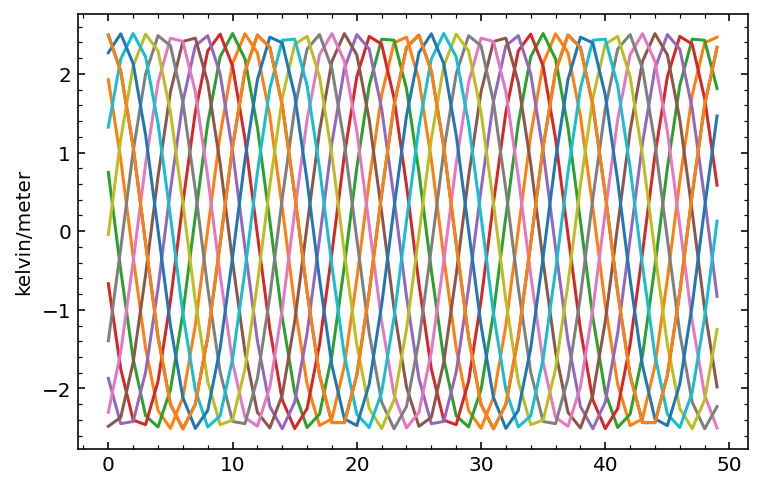

In [12]:
plt.plot(jxd)
plt.show()

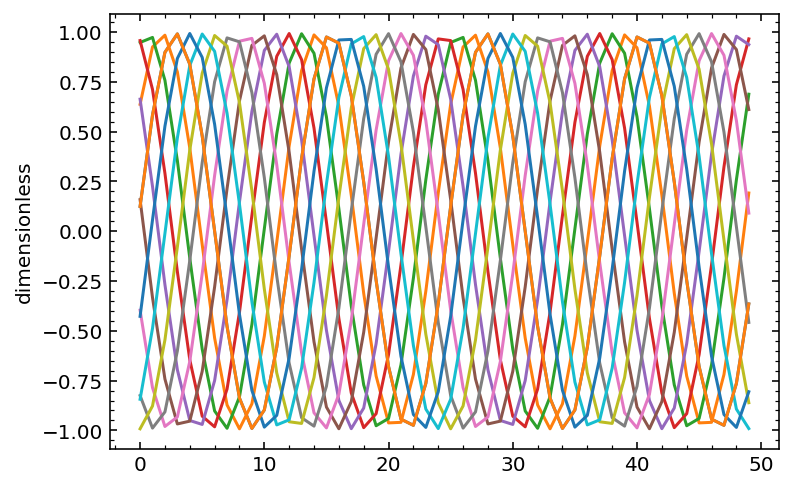

In [13]:
plt.plot(ja)
plt.show()